In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
!pip install watermark

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.4.0
    Uninstalling importlib-metadata-3.4.0:
      Successfully uninstalled importlib-metadata-3.4.0


In [3]:
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.7.9


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import math
from scipy.stats import norm, skew

warnings.filterwarnings("ignore")

In [5]:
%reload_ext watermark

%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

pandas    : 1.2.2
numpy     : 1.19.5
seaborn   : 0.11.1
matplotlib: 3.4.0



In [6]:
sns.set_palette("Accent")
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)
color = sns.color_palette()

In [7]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [10]:
df.shape

(21613, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
df.drop("id", axis = 1, inplace = True)
df.drop("date", axis = 1, inplace = True)
df.drop("zipcode", axis = 1, inplace = True)
df.drop("yr_renovated", axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


In [14]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df = df.dropna()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,47.5345,-122.069,1410,1287


In [16]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.notnull().sum()

price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [18]:
df.var()

price            1.347824e+11
bedrooms         8.650150e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381703e+00
sqft_above       6.857347e+05
sqft_basement    1.958727e+05
yr_built         8.627973e+02
lat              1.919990e-02
long             1.983262e-02
sqft_living15    4.697612e+05
sqft_lot15       7.455182e+08
dtype: float64

In [19]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [20]:
df = df.reset_index().drop("index", axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,47.5345,-122.069,1410,1287


In [21]:
print(df.price.count())
print(df.price.max())
print(df.price.min())

21613
7700000.0
75000.0


In [22]:
mean_data = df['price'] = np.log1p(df['price'])
mean_data

0        12.309987
1        13.195616
2        12.100718
3        13.311331
4        13.142168
           ...    
21608    12.793862
21609    12.899222
21610    12.904461
21611    12.899222
21612    12.691584
Name: price, Length: 21613, dtype: float64

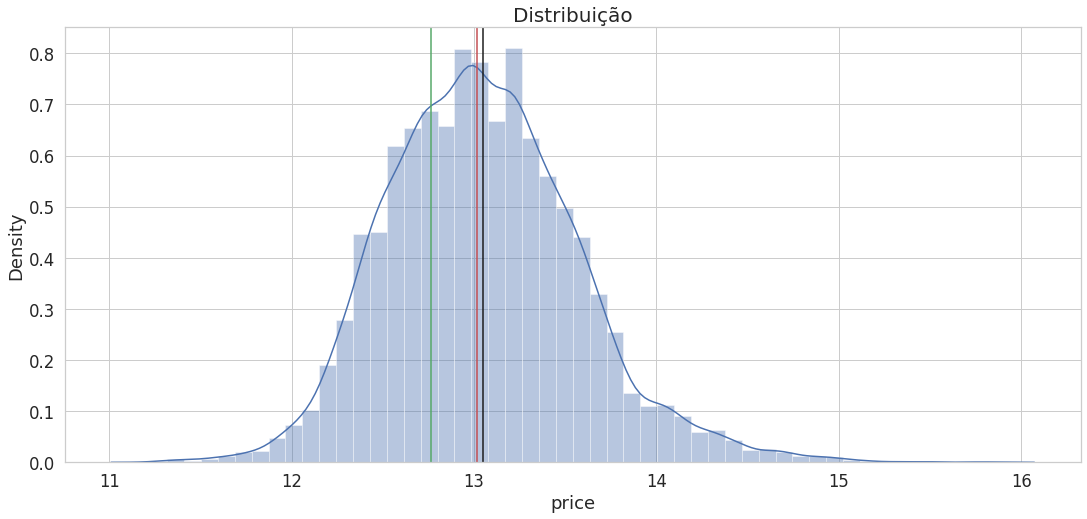

In [23]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df['price']);
plt.title("Distribuição", fontsize=20)
plt.axvline(df['price'].mean(), color='k')
plt.axvline(df['price'].median(), color='r')
plt.axvline(df['price'].mode()[0], color='g');

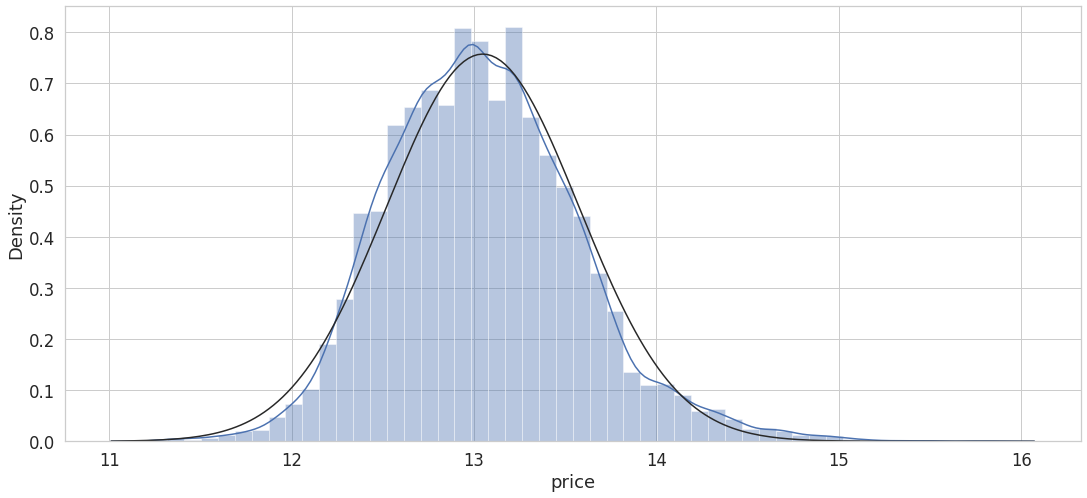

In [24]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df['price'], fit=norm);

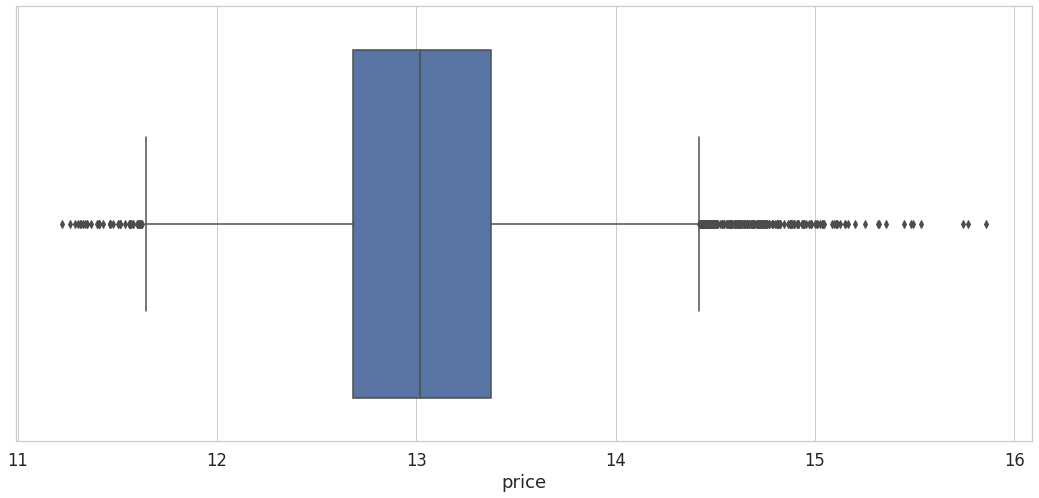

In [25]:
plt.figure(figsize=(18.2, 8))

boxplot = sns.boxplot(df["price"]);

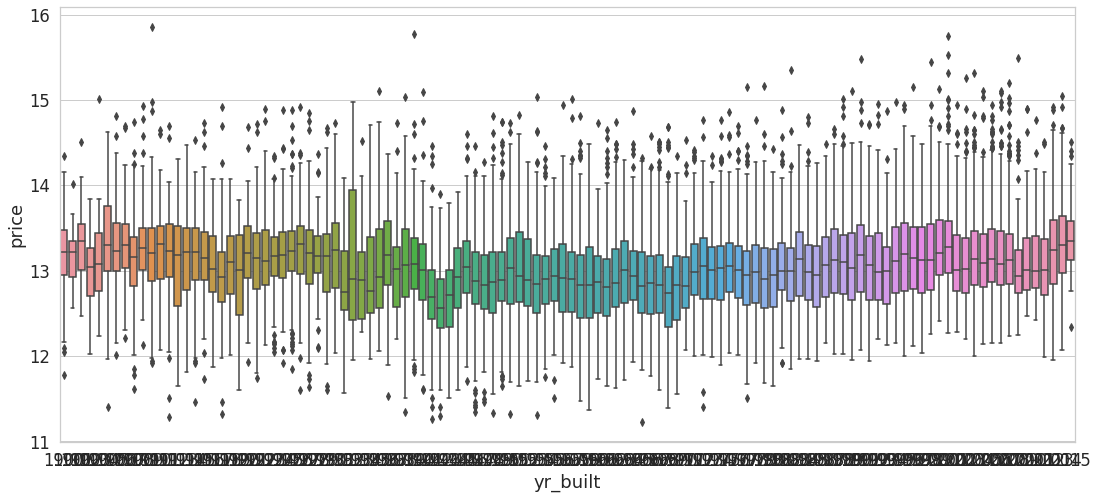

In [26]:
plt.figure(figsize=(18.2, 8))

box = sns.boxplot(x = "yr_built", y = "price", data = df)

In [27]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,13.047819,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,47.560053,-122.213896,1986.552492,12768.455652
std,0.526683,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.138564,0.140828,685.391304,27304.179631
min,11.225257,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,12.682155,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,13.017005,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,13.377007,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,15.856731,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [28]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.343561,0.550802,0.695341,0.099622,0.310558,0.174586,0.346522,0.039558,0.703634,0.601802,0.316970,0.080654,0.449174,0.049942,0.619312,0.091592
bedrooms,0.343561,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.550802,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.024573,0.223042,0.568634,0.087175
sqft_living,0.695341,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.099622,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,-0.085683,0.229521,0.144608,0.718557
floors,0.310558,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.049614,0.125419,0.279885,-0.011269
waterfront,0.174586,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,-0.014274,-0.041910,0.086463,0.030703
view,0.346522,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.006157,-0.078400,0.280439,0.072575
condition,0.039558,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.703634,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.114084,0.198372,0.713202,0.119248


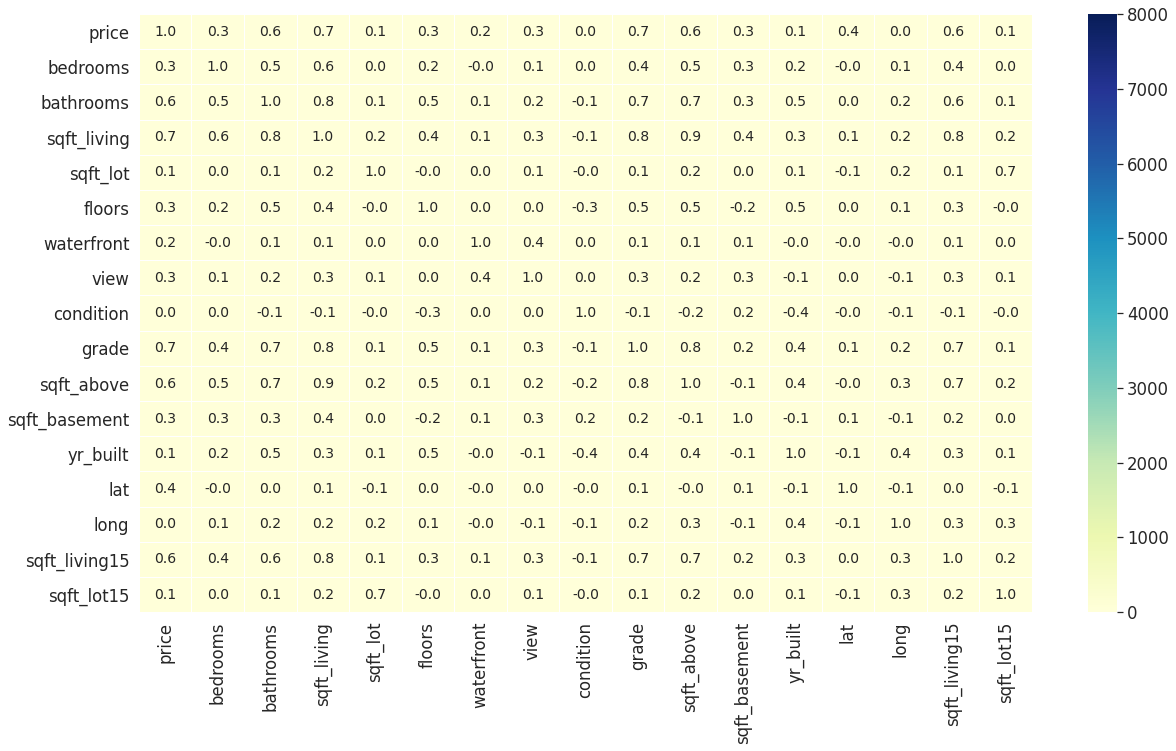

In [29]:
plt.figure(figsize=(20,11))

ax = sns.heatmap(corr, vmin=0, vmax=8000, cmap="YlGnBu", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

**Data Exploration**

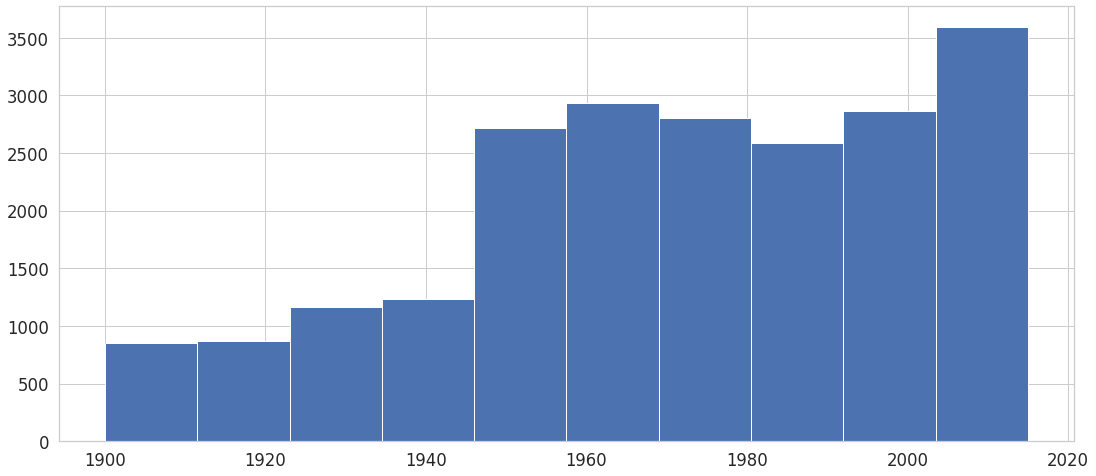

In [30]:
plt.figure(figsize=(18.2, 8))

plt.hist(df["yr_built"]);

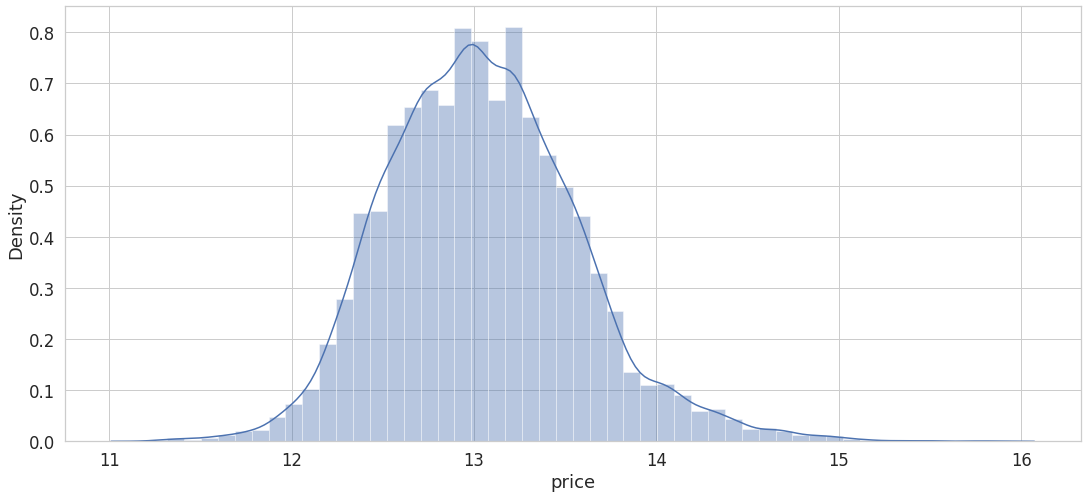

In [31]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df["price"])

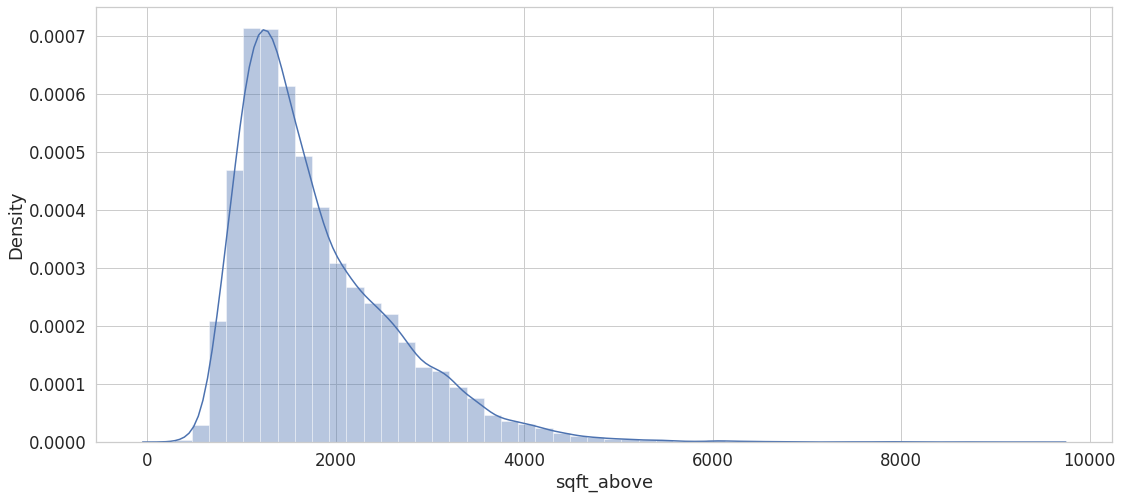

In [32]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df["sqft_above"])

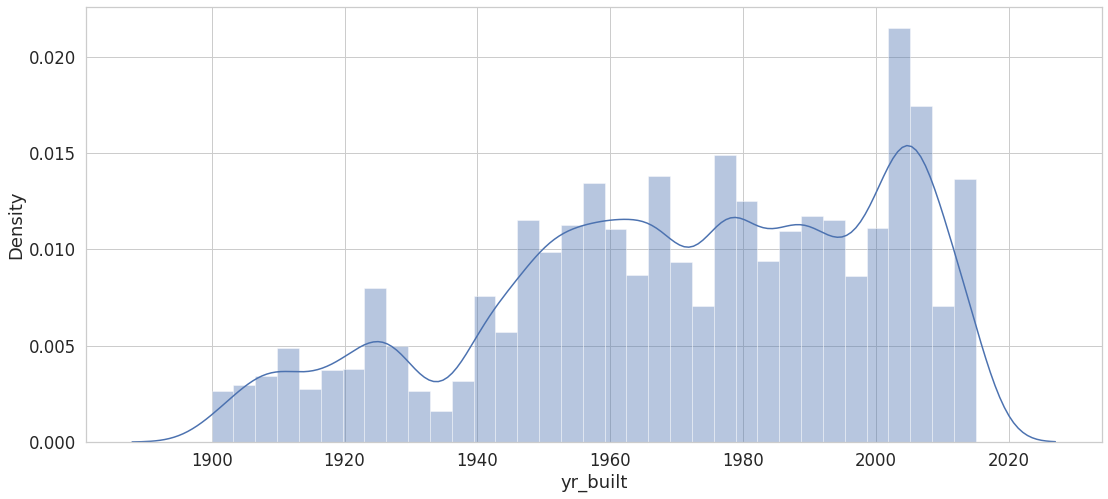

In [33]:
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df["yr_built"])

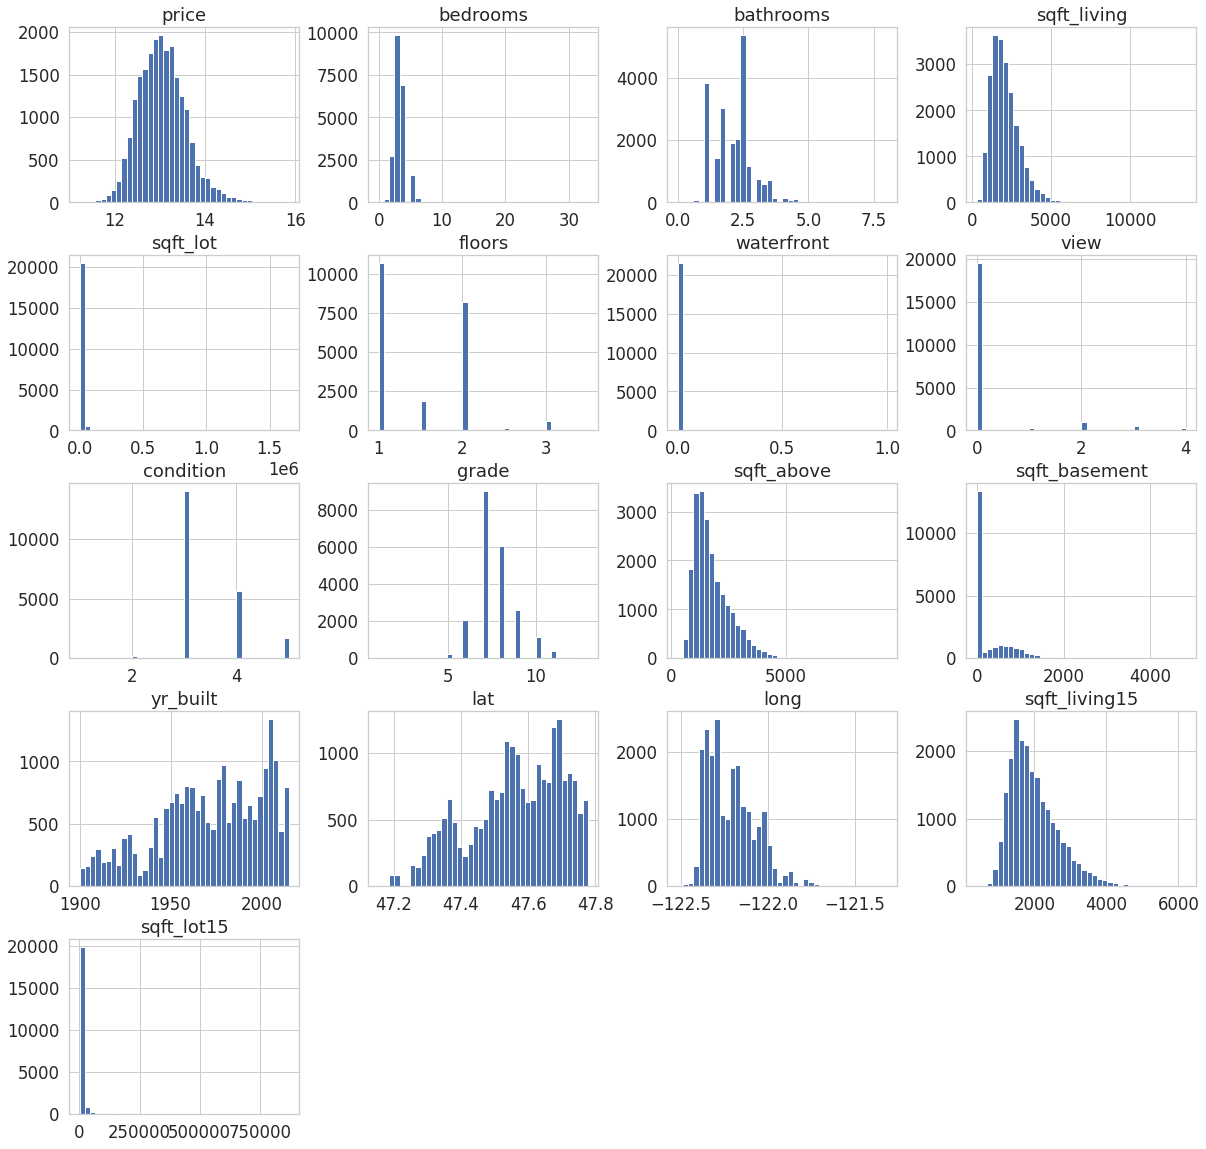

In [34]:
df.hist(bins = 40, figsize=(20.2, 20))
plt.show()

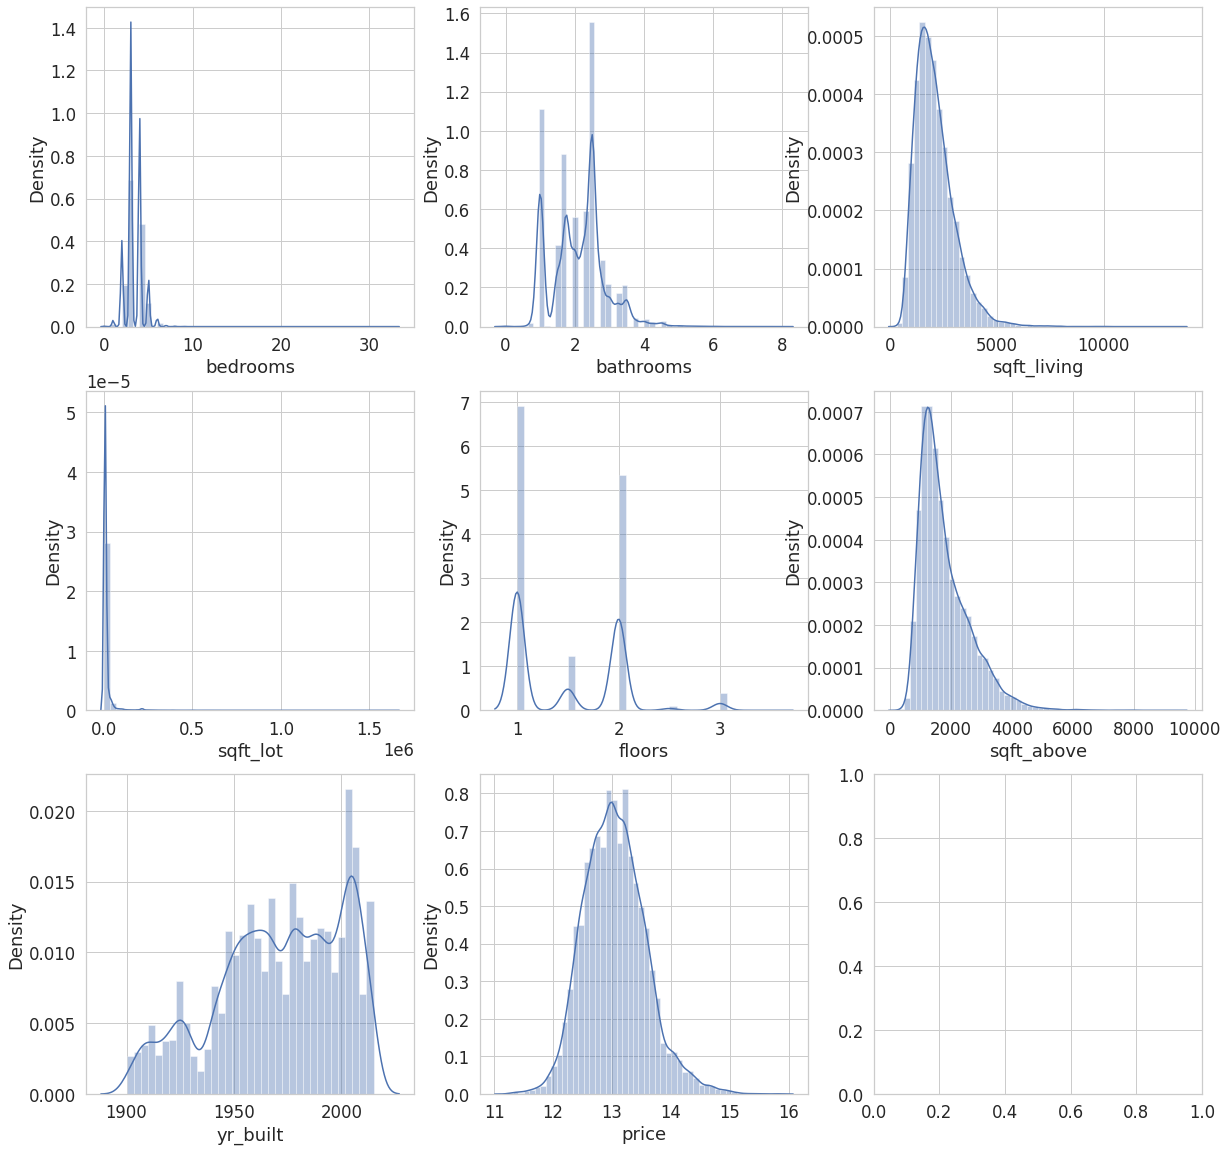

In [35]:
fig1 , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20,20))

sns.distplot(df["bedrooms"] , ax=axes[0, 0])
sns.distplot(df["bathrooms"] ,  ax=axes[0, 1])
sns.distplot(df["sqft_living"] , ax=axes[0, 2])
sns.distplot(df["sqft_lot"], ax=axes[1, 0] )
sns.distplot(df["floors"] , ax=axes[1, 1] )
sns.distplot(df["sqft_above"] , ax=axes[1, 2] )
sns.distplot(df["yr_built"] , ax=axes[2, 0])
sns.distplot(df["price"], ax=axes[2, 1])

plt.show()

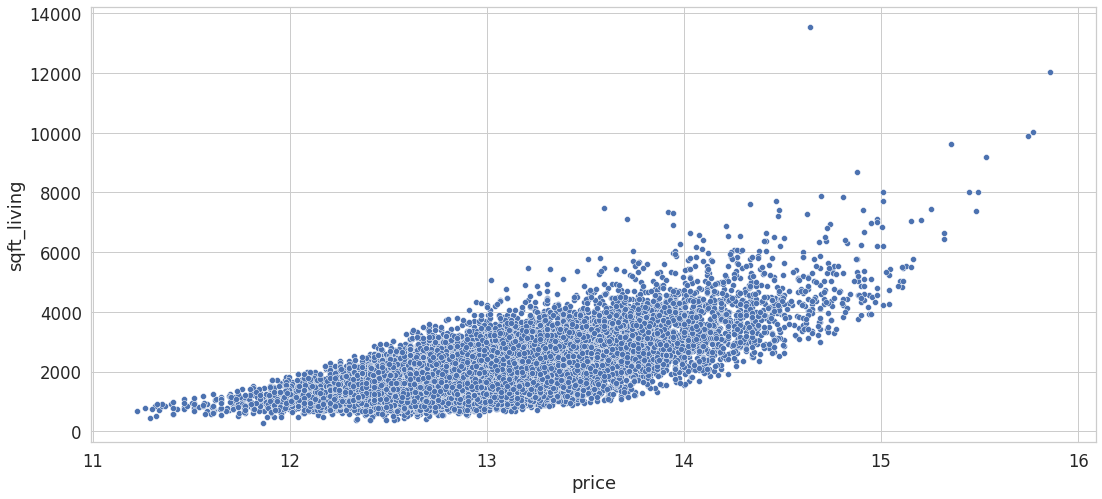

In [36]:
plt.figure(figsize=(18, 8))

ax = sns.scatterplot(x="price", y="sqft_living", data = df)

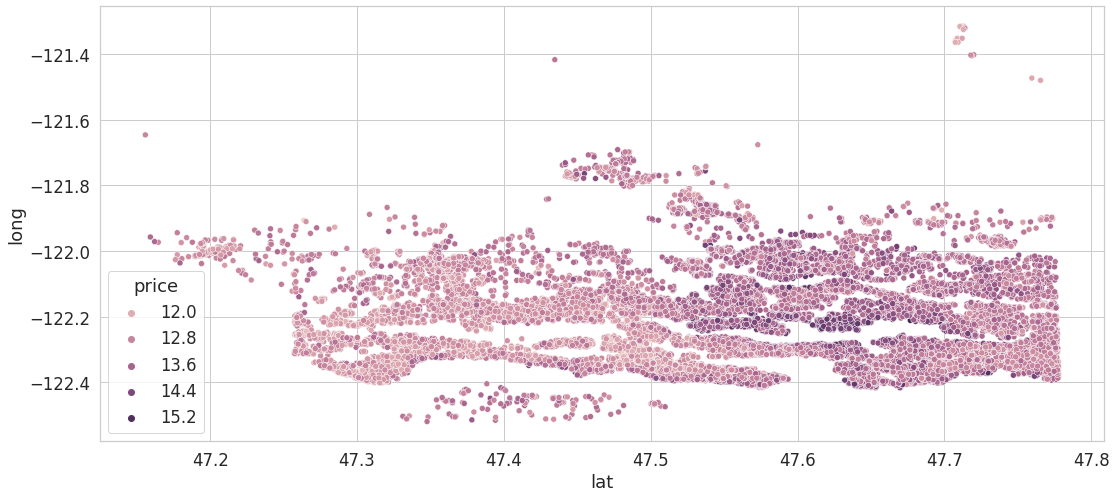

In [37]:
plt.figure(figsize=(18, 8))

ax = sns.scatterplot(x="lat", y="long", data = df, hue = "price")

In [38]:
x = df.drop('price', axis=1)
y = df['price']

In [39]:
x.shape

(21613, 16)

In [40]:
y.shape

(21613,)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_x = scaler.fit_transform(x)
scaler_x

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [42]:
scaler_x.shape

(21613, 16)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 26)

In [44]:
x_train.shape

(17290, 16)

In [45]:
y_train.shape

(17290,)

In [46]:
x_test.shape

(4323, 16)

In [47]:
y_test.shape

(4323,)

**Modelo 01 - Random Forest Regressor**

In [48]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest_regressor = RandomForestRegressor(max_depth=2, random_state=0)
model_random_forest_regressor_fit = model_random_forest_regressor.fit(x_train, y_train)
model_random_forest_regressor_pred = model_random_forest_regressor.predict(x_test)
model_random_forest_regressor_pred

array([12.6022005 , 13.60746774, 12.6022005 , ..., 13.61833956,
       13.67574998, 12.60764581])

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RMSE = mean_squared_error(y_test, model_random_forest_regressor_pred)
MAE = mean_absolute_error(y_test, model_random_forest_regressor_pred)
MSE = mean_squared_error(y_test, model_random_forest_regressor_pred)
R2 = r2_score(y_test, model_random_forest_regressor_pred)

metricas = pd.DataFrame({
    "Metricas" :["RMSE",
                 "MAE", "MSE",
                 "R2"],
    "Resultados":[RMSE, 
                  MAE, MSE, R2]})

metricas.sort_values(by = "Resultados", ascending = False)

,Metricas,Resultados
3,R2,0.570865
1,MAE,0.266609
0,RMSE,0.121780
2,MSE,0.121780


**Modelo 02 - K-NN Regressor**

In [50]:
from sklearn.neighbors import KNeighborsRegressor

modelo_KNN_regressor = KNeighborsRegressor(n_neighbors = 10, metric = 'euclidean')
modelo_KNN_regressor_fit = modelo_KNN_regressor.fit(x_train, y_train)
modelo_KNN_regressor_pred = modelo_KNN_regressor.predict(x_test)
modelo_KNN_regressor_pred

array([12.76220347, 13.24536304, 13.19996807, ..., 13.59288866,
       13.6546175 , 12.94925286])

In [51]:
RMSE = mean_squared_error(y_test, modelo_KNN_regressor_pred)
MAE = mean_absolute_error(y_test, modelo_KNN_regressor_pred)
MSE = mean_squared_error(y_test, modelo_KNN_regressor_pred)
R2 = r2_score(y_test, modelo_KNN_regressor_pred)

metricas = pd.DataFrame({
    "Metricas" :["RMSE",
                 "MAE", "MSE",
                 "R2"],
    "Resultados":[RMSE, 
                  MAE, MSE, R2]})

metricas.sort_values(by = "Resultados", ascending = False)

,Metricas,Resultados
3,R2,0.509725
1,MAE,0.291673
0,RMSE,0.139130
2,MSE,0.139130


**Modelo 03 - Decision Tree Regressor**

In [52]:
from sklearn.tree import DecisionTreeRegressor

model_decision_tree_regressor = DecisionTreeRegressor(random_state = 30)
model_decision_tree_regressor_fit = model_decision_tree_regressor.fit(x_train, y_train)
model_decision_tree_regressor_pred = model_decision_tree_regressor.predict(x_test)
model_decision_tree_regressor_pred

array([12.89295273, 13.44878672, 12.78689344, ..., 14.32533628,
       13.71569133, 12.6443308 ])

In [53]:
RMSE = mean_squared_error(y_test, model_decision_tree_regressor_pred)
MAE = mean_absolute_error(y_test, model_decision_tree_regressor_pred)
MSE = mean_squared_error(y_test, model_decision_tree_regressor_pred)
R2 = r2_score(y_test, model_decision_tree_regressor_pred)

metricas = pd.DataFrame({
    "Metricas" :["RMSE",
                 "MAE", "MSE",
                 "R2"],
    "Resultados":[RMSE, 
                  MAE, MSE, R2]})

metricas.sort_values(by = "Resultados", ascending = False)

,Metricas,Resultados
3,R2,0.761109
1,MAE,0.183148
0,RMSE,0.067792
2,MSE,0.067792


**Modelo 04 - Regressão linear**

In [54]:
from sklearn.linear_model import LinearRegression

model_linear_regression = LinearRegression()
model_linear_regression_fit = model_linear_regression.fit(x_train, y_train)
model_linear_regression_pred = model_linear_regression.predict(x_train)
model_linear_regression_pred

array([12.62379131, 12.6456417 , 12.55340476, ..., 13.8315289 ,
       12.76878205, 13.18076872])

In [55]:
model_linear_regression.coef_

array([-1.11111606e-02,  7.30699809e-02,  9.74620694e-05,  5.39820827e-07,
        7.07281923e-02,  3.78877172e-01,  5.84624550e-02,  6.10476985e-02,
        1.58301540e-01,  4.26931697e-05,  5.47688995e-05, -3.50677648e-03,
        1.33870631e+00, -3.94028252e-02,  1.03859172e-04, -3.56003868e-07])

In [56]:
model_linear_regression.intercept_

-50.688770730726866

In [57]:
model_linear_regression.coef_ * 27.74456356 + model_linear_regression.intercept_

array([-50.99704503, -48.661476  , -50.68606669, -50.68875575,
       -48.7264479 , -40.17698896, -49.06675543, -48.99502898,
       -46.29676359, -50.68758623, -50.68725119, -50.78606471,
       -13.54694855, -51.78198492, -50.6858892 , -50.68878061])

In [58]:
predict = model_linear_regression.predict(x_train)
predict

array([12.62379131, 12.6456417 , 12.55340476, ..., 13.8315289 ,
       12.76878205, 13.18076872])

In [59]:
y_predict = model_linear_regression.predict(x_test)
y_predict

array([12.68730506, 13.38172875, 12.75012675, ..., 13.80391827,
       13.68625367, 13.1041149 ])

In [60]:
predicts = y_train - predict
predicts

6601    -0.046152
12031    0.291599
17784   -0.110282
9819    -0.019375
7138    -0.268839
           ...   
6304    -0.230277
10202    0.136836
10177    0.320455
9648     0.024941
21301    0.145345
Name: price, Length: 17290, dtype: float64

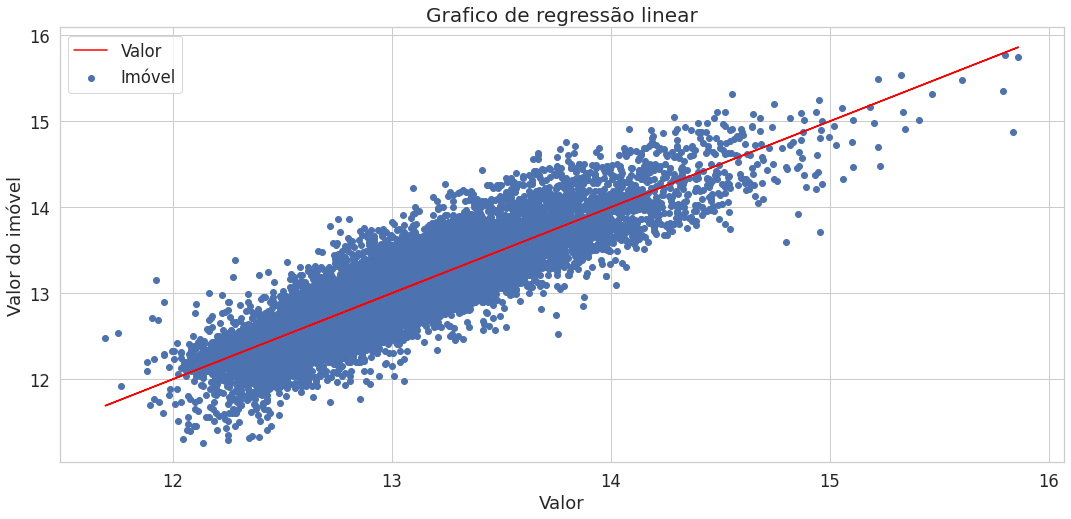

In [61]:
plt.figure(figsize=(18, 8))
plt.scatter(predict, y_train)
plt.plot(predict, model_linear_regression.predict(x_train), color = "red")
plt.title("Grafico de regressão linear", fontsize = 20)
plt.xlabel("Valor")
plt.ylabel("Valor do imóvel")
plt.legend(["Valor", "Imóvel"])

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Imóvel', ylabel='Density'>

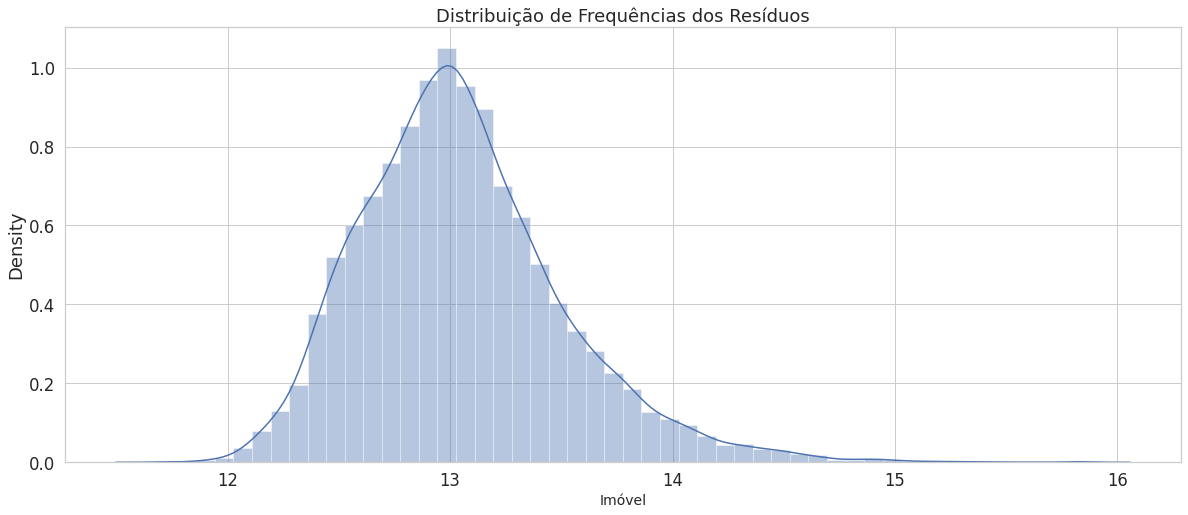

In [62]:
ax = sns.distplot(predict)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Imóvel', fontsize=14)
ax

In [63]:
RMSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
R2 = r2_score(y_test, y_predict)

metricas = pd.DataFrame({
    "Metricas" :["RMSE",
                 "MAE", "MSE",
                 "R2"],
    "Resultados":[RMSE, 
                  MAE, MSE, R2]})

metricas.sort_values(by = "Resultados", ascending = False)

,Metricas,Resultados
3,R2,0.767901
1,MAE,0.197593
0,RMSE,0.065865
2,MSE,0.065865


**Previsão do imovel**

In [64]:
x_test[0:1]
a1 = x_test[0: 1]
pred = model_linear_regression.predict(a1)[0]
pred

12.687305063475755

In [65]:
bedrooms = 4
bathrooms = 3.2
sqft_living = 1223
sqft_lot = 1112
floors = 2.2
waterfront = 1
view = 2
condition = 3
grade = 2
sqft_above = 3
sqft_basement = 3	
yr_built = 1976

lat = 47.4404 
long = -122.191

sqft_living15 = 1985
sqft_lot15 = 10200

a1 = [[bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, lat, long, sqft_living15, sqft_lot15]]

print("{0:.2f} Valor do imóvel". format(model_linear_regression.predict(a1)[0]))

12.37 Valor do imóvel


In [66]:
import plotly.express as px

apt = df[["lat", "long", "price"]]

fig = px.scatter_mapbox(apt,
                       lat = "lat",
                       lon = "long",
                       size = "price",
                       color_continuous_scale = px.colors.cyclical.IceFire, 
                       size_max = 15, 
                       zoom = 10)

fig.update_layout(
    title = "Mapa de imoveis a venda",
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Salvando modelo**

In [67]:
import pickle

saida = open("model_linear_regression_pred", "wb")
pickle.dump(model_linear_regression_pred, saida)
saida.close()

saida = open("model_random_forest_regressor_pred", "wb")
pickle.dump(model_random_forest_regressor_pred, saida)
saida.close()

saida = open("model_decision_tree_regressor_pred", "wb")
pickle.dump(model_decision_tree_regressor_pred, saida)
saida.close()

saida = open("modelo_KNN_regressor_pred", "wb")
pickle.dump(modelo_KNN_regressor_pred, saida)
saida.close()